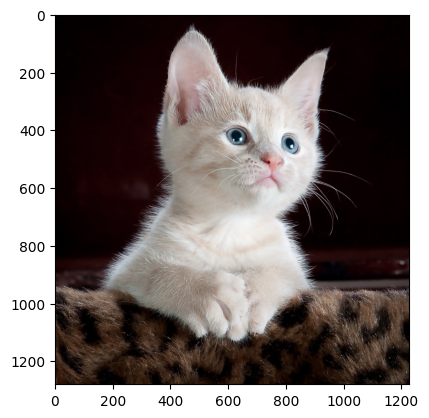

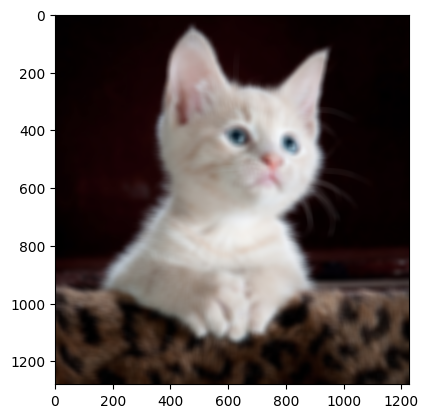

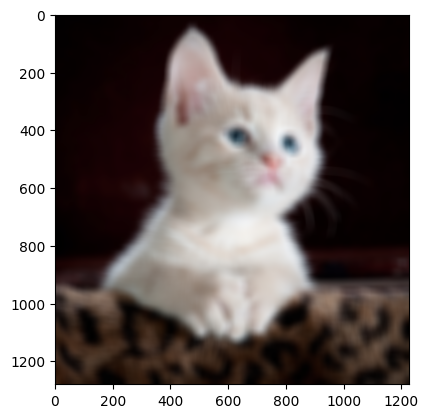

In [2]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/Users/nguyendinhvinh2004gmail.com/Desktop/New_Data/De Cuong mon học/Machine Learning Course - VinhND/Week 4/QSTC/Computer Vision Foundation/Computer Vision Foundation - Session 2 - LD/dataset/cat_image.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img) 

# Show the blurred image with different size of kernel
blurImg = cv2.blur(img,(21,21)) 
plt.figure()
plt.imshow(blurImg) 

blurImg = cv2.blur(img,(31,31)) 
plt.figure()
plt.imshow(blurImg) 

plt.show()





In [11]:
import numpy as np
from math import pi

def generateTemplate(templateSize, sigma):
	template = np.zeros(templateSize*templateSize)
	center=int((templateSize-1)/2);

	total=0;

	for x in range(templateSize):
		for y in range (templateSize):
			template[x*templateSize+y] = (1.0/float(2*pi*sigma*sigma))*np.exp(float(-((x-center)*(x-center)+(y-center)*(y-center))/(2*sigma*sigma)));
			total+=template[x*templateSize+y];
		
	print("total",total) 
	for x in range(templateSize):
		for y in range (templateSize):
			template[x*templateSize+y] = template[x*templateSize+y]/total;
	return template


In [69]:
radius = 1
sigma = 1
kernel = np.zeros((3,3))
sum = 0
for x in range(-radius, radius+1, 1):
    for y in range(-radius, radius+1, 1):
        exponentNumerator = float(-(x * x + y * y))
        exponentDenominator = (2 * sigma * sigma)

        eExpression = np.exp(exponentNumerator / exponentDenominator)
        kernelValue = (eExpression / (2 * pi * sigma * sigma))

        #We add radius to the indices to prevent out of bound issues 
        #because x and y can be negative
        kernel[x + radius][y + radius] = kernelValue
        sum += kernelValue

for x in range(-radius, radius+1, 1):
    for y in range(-radius, radius+1, 1):
        kernel[x + radius][y + radius] = kernel[x + radius][y + radius]/sum
        
print(kernel)

ZeroDivisionError: float division by zero

In [64]:
for x in range(-radius, radius+1, 1):
    print(x)

-1
0
1


In [56]:
print(generateTemplate(3,1))

total 0.7794836797093876
[0.07511361 0.1238414  0.07511361 0.1238414  0.20417996 0.1238414
 0.07511361 0.1238414  0.07511361]


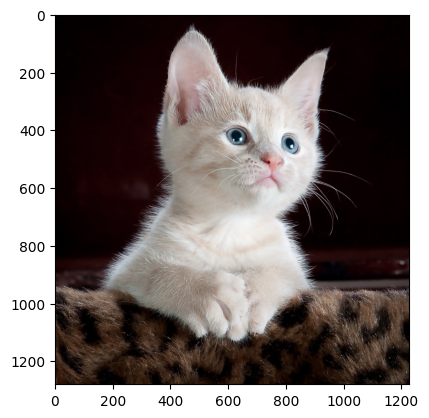

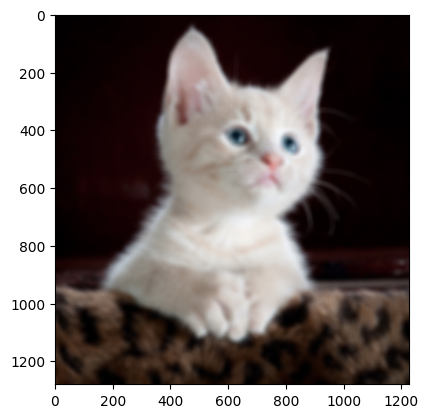

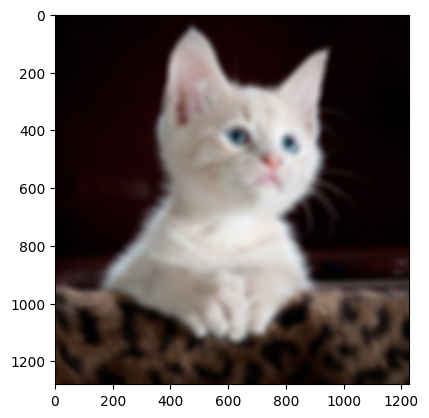

In [12]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/Users/nguyendinhvinh2004gmail.com/Desktop/New_Data/De Cuong mon học/Machine Learning Course - VinhND/Week 4/QSTC/Computer Vision Foundation/Computer Vision Foundation - Session 2 - LD/dataset/cat_image.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img) 
plt.show()
# Show the blurred image with different size of kernel

# Show the blurred image with different size of kernel
blurImg = cv2.GaussianBlur(img,(21,21), 0) 
plt.figure()
plt.imshow(blurImg) 

blurImg = cv2.GaussianBlur(img,(31,31), 0) 
plt.figure()
plt.imshow(blurImg) 

plt.show()


In [15]:
import numpy as np
import cv2
cap = cv2.VideoCapture(0)

def rectangle_detection(input_image):
    # Make a copy to draw bounding box
    input_image_cpy = input_image.copy()

    # Convert input image to grayscale
    gray_img = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Convert the grayscale image to binary (image binarization opencv python)
    ret, binary_img = cv2.threshold(gray_img, 200, 255, cv2.THRESH_BINARY)
    
    cv2.imshow("binary_img",binary_img)

    # Invert image
    inverted_binary_img = ~ binary_img

    kernel = np.ones((5, 5), np.uint8)

    inverted_binary_img = cv2.erode(inverted_binary_img, kernel, iterations=2)
    inverted_binary_img = cv2.dilate(inverted_binary_img, kernel, iterations=2)


    
    # Detect contours
    # hierarchy variable contains information about the relationship between each contours
    contours_list, hierarchy = cv2.findContours(inverted_binary_img,
                                           cv2.RETR_TREE,
                                           cv2.CHAIN_APPROX_SIMPLE) # Find contours

    contour1 = input_image_cpy
    # for each detected contours
    for contour_num in range(len(contours_list)):

    
        # Make sure contour area is large enough (Rejecting unwanted contours)
        if (cv2.contourArea(contours_list[contour_num])) > 1000:
            
            
            # Find number of points of detected contour
            end_points = cv2.approxPolyDP(contours_list[contour_num], 0.01 * cv2.arcLength(contours_list[contour_num], True), True)

        
            # Find first point of each shape
            point_x = end_points[0][0][0]
            point_y = end_points[0][0][1]

            # Writing shape name at center of each shape in black color (0, 0, 0)
            text_color_black = (0, 0, 0)

            # If a contour have three end points, then shape should be a Triangle
            if len(end_points) == 4:
                cv2.putText(input_image_cpy, 'Rectangle', (point_x, point_y),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.9, text_color_black, 2)
                contour1 = cv2.drawContours(input_image_cpy, contours_list, contour_num, (255, 0, 255), 3)
            
    return contour1


while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
  
    frame = cv2.resize(frame, (640, 480))
    frame = rectangle_detection(frame)
    cv2.imshow("Detection Result",frame)

    if cv2.waitKey(1) == ord('q'):
        break
        
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
for i in range (1,5): #trick for closing the display window on macos
        cv2.waitKey(1)

In [ ]:
#### Lane Detection Algorithm


In [3]:
import numpy as np
import cv2

In [3]:
def region_selection(image):
	mask = np.zeros_like(image)
	ignore_mask_color = 255
	# creating a polygon to focus only on the road in the picture
	# we have created this polygon in accordance to how the camera was placed
	rows, cols = image.shape[:2]
	bottom_left = [cols * 0.1, rows * 0.95]
	top_left	 = [cols * 0.4, rows * 0.6]
	bottom_right = [cols * 0.9, rows * 0.95]
	top_right = [cols * 0.6, rows * 0.6]
	vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
	# filling the polygon with white color and generating the final mask
	cv2.fillPoly(mask, vertices, ignore_mask_color)
	# performing Bitwise AND on the input image and mask to get only the edges on the road
	masked_image = cv2.bitwise_and(image, mask)
	return masked_image


In [4]:
def hough_transform(image):
	"""
	Determine and cut the region of interest in the input image.
	Parameter:
		image: grayscale image which should be an output from the edge detector
	"""
	# Distance resolution of the accumulator in pixels.
	rho = 1
	# Angle resolution of the accumulator in radians.
	theta = np.pi/180
	# Only lines that are greater than threshold will be returned.
	threshold = 20
	# Line segments shorter than that are rejected.
	minLineLength = 20
	# Maximum allowed gap between points on the same line to link them
	maxLineGap = 500
	# function returns an array containing dimensions of straight lines
	# appearing in the input image
	return cv2.HoughLinesP(image, rho = rho, theta = theta, threshold = threshold,
						minLineLength = minLineLength, maxLineGap = maxLineGap)


In [5]:

def average_slope_intercept(lines):
	"""
	Find the slope and intercept of the left and right lanes of each image.
	Parameters:
		lines: output from Hough Transform
	"""
	left_lines = [] #(slope, intercept)
	left_weights = [] #(length,)
	right_lines = [] #(slope, intercept)
	right_weights = [] #(length,)

	for line in lines:
		for x1, y1, x2, y2 in line:
			if x1 == x2:
				continue
			# calculating slope of a line
			slope = (y2 - y1) / (x2 - x1)
			# calculating intercept of a line
			intercept = y1 - (slope * x1)
			# calculating length of a line
			length = np.sqrt(((y2 - y1) ** 2) + ((x2 - x1) ** 2))
			# slope of left lane is negative and for right lane slope is positive
			if slope < 0:
				left_lines.append((slope, intercept))
				left_weights.append((length))
			else:
				right_lines.append((slope, intercept))
				right_weights.append((length))
	#
	left_lane = np.dot(left_weights, left_lines) / np.sum(left_weights) if len(left_weights) > 0 else None
	right_lane = np.dot(right_weights, right_lines) / np.sum(right_weights) if len(right_weights) > 0 else None
	return left_lane, right_lane


def pixel_points(y1, y2, line):
	"""
	Converts the slope and intercept of each line into pixel points.
		Parameters:
			y1: y-value of the line's starting point.
			y2: y-value of the line's end point.
			line: The slope and intercept of the line.
	"""
	if line is None:
		return None
	slope, intercept = line
	x1 = int((y1 - intercept)/slope)
	x2 = int((y2 - intercept)/slope)
	y1 = int(y1)
	y2 = int(y2)
	return ((x1, y1), (x2, y2))

def lane_lines(image, lines):
	"""
	Create full lenght lines from pixel points.
		Parameters:
			image: The input test image.
			lines: The output lines from Hough Transform.
	"""
	left_lane, right_lane = average_slope_intercept(lines)
	y1 = image.shape[0]
	y2 = y1 * 0.6
	left_line = pixel_points(y1, y2, left_lane)
	right_line = pixel_points(y1, y2, right_lane)
	return left_line, right_line


def draw_lane_lines(image, lines, color=[0, 255, 0], thickness=12):
	"""
	Draw lines onto the input image.
		Parameters:
			image: The input test image (video frame in our case).
			lines: The output lines from Hough Transform.
			color (Default = red): Line color.
			thickness (Default = 12): Line thickness.
	"""
	line_image = np.zeros_like(image)
	for line in lines:
		if line is not None:
			cv2.line(line_image, *line, color, thickness)
	return cv2.addWeighted(image, 1.0, line_image, 1.0, 0.0)


In [8]:
def frame_processor(image):

	# convert the RGB image to Gray scale
	grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

	# applying gaussian Blur which removes noise from the image
	# and focuses on our region of interest
	# size of gaussian kernel
	kernel_size = 5
	# Applying gaussian blur to remove noise from the frames
	blur = cv2.GaussianBlur(grayscale, (kernel_size, kernel_size), 0)
    
	cv2.imshow("blur", blur)
        
	# first threshold for the hysteresis procedure
	low_t = 50
	# second threshold for the hysteresis procedure
	high_t = 150
	# applying canny edge detection and save edges in a variable
	edges = cv2.Canny(blur, low_t, high_t)
    
	cv2.imshow("edges", edges)
    
	# since we are getting too many edges from our image, we apply
	# a mask polygon to only focus on the road
	# Will explain Region selection in detail in further steps
	region = region_selection(edges)
	# Applying hough transform to get straight lines from our image
	# and find the lane lines
	# Will explain Hough Transform in detail in further steps
	cv2.imshow("hough_transform", region)
# 	cv2.waitKey(0)
	hough = hough_transform(region)
	#lastly we draw the lines on our resulting frame and return it as output
	result = draw_lane_lines(image, lane_lines(image, hough))
	return result


In [9]:
def close_window_os():
    cv2.destroyAllWindows()
    for i in range (1,5): #trick for closing the display window on macos
        cv2.waitKey(1)

In [ ]:
#Lane detection for single image
image = cv2.imread("/Users/nguyendinhvinh2004gmail.com/Desktop/New_Data/De Cuong mon học/Machine Learning Course - VinhND/Week 4/QSTC/Computer Vision Foundation/Computer Vision Foundation - Session 2 - LD/dataset/test_image.jpg")
result = frame_processor(image)
cv2.imshow("result",result)
cv2.waitKey(0)
close_window_os()


In [12]:
#Lane detection for video image
import cv2
# cap = cv2.VideoCapture("/Users/nguyendinhvinh2004gmail.com/Desktop/New_Data/De Cuong mon học/Machine Learning Course - VinhND/Week 4/QSTC/Computer Vision Foundation/Computer Vision Foundation - Session 2 - LD/dataset/test2.mp4")

# cap = cv2.VideoCapture("/Users/nguyendinhvinh2004gmail.com/Downloads/challenge_video.mp4")
cap = cv2.VideoCapture("/Users/nguyendinhvinh2004gmail.com/Downloads/harder_challenge_video.mp4")




while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
        
    result = frame_processor(frame)    
    cv2.imshow("result",result)
    cv2.waitKey(33)
    
    if cv2.waitKey(1) == ord('q'):
        break
    
close_window_os()

Can't receive frame (stream end?). Exiting ...
